<a href="https://colab.research.google.com/github/jvidorreta/TFG_SDG_JVID/blob/dev/TFG_SDG_JVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Librerias + BBDD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests

In [2]:
url = 'https://github.com/jvidorreta/TFG_SDG_JVID/raw/main/BBDD-Local%20(1).xlsx'

# Download the file using the requests library
response = requests.get(url)

# Read the Excel file using pandas
df = pd.read_excel(response.content, engine='openpyxl',sheet_name='C_BBDD')

In [3]:
df.shape #Muestra el nº de filas y columnas en la BBDD

(16041, 9)

In [4]:
df.head(10)

,ID,Tipo,Categoría,Categoría.1,Categoría.2,Fecha de creación,Fecha solución propuesta,Subcategoría,Fecha de modificación
0,1165252,Extracciones,Extracción de datos,NaN,NaN,2022-12-30 14:32:00,NaT,NaN,2022-12-30 15:19:00
1,1165248,Extracciones,Extracción de datos,NaN,NaN,2022-12-30 14:23:00,NaT,NaN,2022-12-30 15:18:00
2,1165245,Gestión de KDE,NaN,NaN,NaN,2022-12-30 14:11:00,NaT,NaN,2022-12-30 15:56:00
3,1165034,Herramientas,NaN,Uso de QLIK SENSE,NaN,2022-12-30 01:09:00,NaT,Accesos,2022-12-30 10:25:00
4,1164938,Herramientas,NaN,Uso de QLIK SENSE,NaN,2022-12-29 17:17:00,NaT,Recarga Stream,2022-12-29 17:44:00
5,1164912,Herramientas,NaN,Uso de QLIK SENSE,NaN,2022-12-29 17:03:00,NaT,Accesos,2022-12-29 17:42:00
6,1164774,Modelo de Datos,NaN,NaN,Consulta sobre el modelo de datos,2022-12-29 14:18:00,NaT,NaN,2022-12-29 14:18:00
7,1164714,Herramientas,NaN,Uso de QLIK SENSE,NaN,2022-12-29 12:38:00,NaT,Incidencias,2022-12-30 13:55:00
8,1164684,Permisos Datapool,NaN,NaN,NaN,2022-12-29 12:00:00,NaT,NaN,2022-12-29 17:39:00
9,1164617,Gestión de KDE,NaN,NaN,NaN,2022-12-29 10:14:00,NaT,NaN,2022-12-30 16:49:00


In [5]:
df.info() #se muestra la información sobre el tipo de datos de las columnas, y cuanto valores no nulos tiene cada una de las columnas que componen el data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16041 entries, 0 to 16040
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        16041 non-null  int64         
 1   Tipo                      16041 non-null  object        
 2   Categoría                 1147 non-null   object        
 3   Categoría.1               7555 non-null   object        
 4   Categoría.2               3392 non-null   object        
 5   Fecha de creación         16041 non-null  datetime64[ns]
 6   Fecha solución propuesta  14606 non-null  datetime64[ns]
 7   Subcategoría              7555 non-null   object        
 8   Fecha de modificación     16041 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 1.1+ MB


# Variables 
**ID:** Número de usuario que realiza la petición

**Tipo:** Sección a la que está relacionada la petición

**Categoría:** Subcategoría del tipo más concreto

**Categoría Final:** Aquí hemos agrupado en una única columna las 3 columnas de Categoría y la de tipo ya que solo habrá un único valor en estas 4 columnas, esta columna será la que se utilice para el analisis.

**Fecha de creación:** Fecha y hora en la cual se crea la petición.

**Fecha solución propuesta:** Fecha y hora en la que se estima que se va a resolver la petición.

**Subcategoría:** Subcategoría asocida a la que hace la petición.

**Fecha de modificación:** Fecha y hora en la cual se resuelve la petición.



In [ ]:
df.describe(include='all')

<ipython-input-34-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,ID,Tipo,Fecha_de_creacion,Fecha_solución_propuesta,Fecha_de_modificacion,Categoria_Final,date,Year,Month,Day,weekday
count,1.604100e+04,16041,16041,14606,16041,16041,16041,16041.000000,16041.000000,16041.000000,16041.000000
unique,NaN,7,15867,1691,13529,15,15867,NaN,NaN,NaN,NaN
top,NaN,Herramientas,2016-12-27 10:34:00,2021-08-01 12:00:00,2022-11-16 11:30:00,Uso de QLIK SENSE,2016-12-27 10:34:00,NaN,NaN,NaN,NaN
freq,NaN,7555,3,166,12,3950,3,NaN,NaN,NaN,NaN
first,NaN,NaN,2016-08-23 10:22:00,2016-09-16 12:00:00,2016-09-01 16:14:00,NaN,2016-08-23 10:22:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-12-30 14:32:00,2022-12-30 12:00:00,2022-12-31 09:50:00,NaN,2022-12-30 14:32:00,NaN,NaN,NaN,NaN
mean,8.369551e+05,NaN,NaN,NaN,NaN,NaN,NaN,2019.784801,6.433576,15.739667,1.949193
std,2.238160e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.781015,3.415414,8.725557,1.379300
min,3.783170e+05,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,1.000000,1.000000,0.000000
25%,6.351280e+05,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,3.000000,8.000000,1.000000


Por defecto solo muestra las que contienen numeros, para que muestre todo hace falta incluir el (include = 'all')

Este método te proporciona un resumen estadístico de las columnas numéricas de un DataFrame, incluyendo la media,
 la desviación estándar, la mediana, los cuartiles, el mínimo y el máximo

In [ ]:
counts_test = df.groupby(['Month']).size().reset_index(name='count')
counts_test.set_index('Month',inplace=True)
counts_test

,count
Month,
1,1160
2,1374
3,1514
4,1394
5,1552
6,1467
7,1357
8,821
9,1227


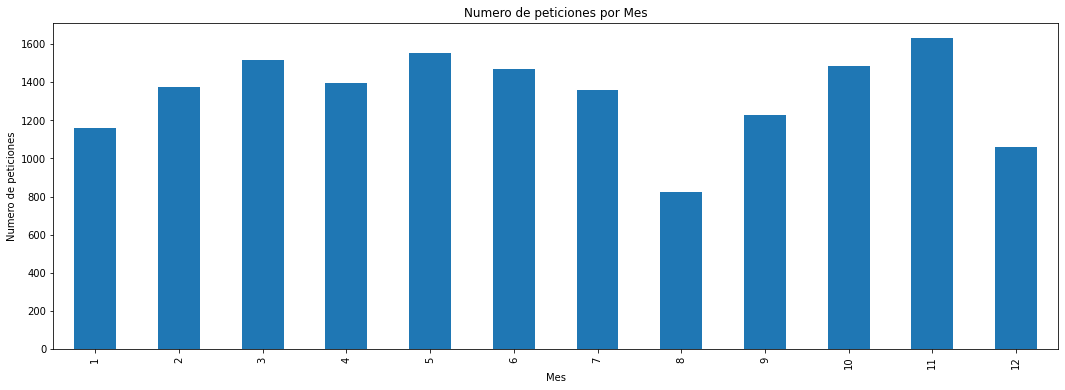

In [ ]:
ax = counts_test['count'].plot(x='Month', y='count',kind='bar',figsize=(18,6))
ax.set(xlabel='Mes', ylabel='Numero de peticiones',title='Numero de peticiones por Mes');




# Data Cleaning


In [6]:
#Se homogeniza la columna de Tipo con las 3 columnas de Categoría para tener una única columna centralizada
df['Categoria_Final'] = df[['Categoría.2','Categoría.1', 'Categoría','Tipo' ]].apply(lambda x: x[x.first_valid_index()], axis=1)

In [7]:
#Borramos las columnas Categoría Categoría.1 Categoría.2 Subcategoría ya que Categoria_Final recoge todas estas
df = df.drop(columns=['Categoría','Categoría.1','Categoría.2','Subcategoría'], axis=0) #axis = 1 --> se borra una columna
                                              #axis = 0 --> se borra una fila 

In [8]:
#Cambiamos el nombre de algunas columnas para poder trabajar con ellas mas adelante

df.rename(columns={'Fecha de creación': 'Fecha_de_creacion'}, inplace=True)
df.rename(columns={'Fecha solución propuesta': 'Fecha_solución_propuesta'}, inplace=True)
df.rename(columns={'Fecha de modificación': 'Fecha_de_modificacion'}, inplace=True)

#El inplace = True hace que las modificaciones se hagan sobr el df actual en vez de crear un 
#nuevo df con las nuevas modificaciones


In [9]:
df.columns

Index(['ID', 'Tipo', 'Fecha_de_creacion', 'Fecha_solución_propuesta',
       'Fecha_de_modificacion', 'Categoria_Final'],
      dtype='object')

In [11]:
#Vemos cuantos campos nulos hay en Fecha_de_modficacion
null_counts = df.Fecha_de_creacion.isnull().sum()
null_counts

0

In [12]:

print(df.columns) #Muestra los nombres de las columnas en un DataFrame.
#Comprobamos que se hayan eliminado las columnas correctamente


Index(['ID', 'Tipo', 'Fecha_de_creacion', 'Fecha_solución_propuesta',
       'Fecha_de_modificacion', 'Categoria_Final'],
      dtype='object')


In [37]:
df['Year'] = pd.DatetimeIndex(df.Fecha_de_creacion).year
df['Month'] = pd.DatetimeIndex(df.Fecha_de_creacion).month
df['Day'] = pd.DatetimeIndex(df.Fecha_de_creacion).day
df['weekday'] = pd.DatetimeIndex(df.Fecha_de_creacion).weekday

In [95]:
#Comprobamos que las columnas nuevas han sido creadas
df.columns

Index(['ID', 'Tipo', 'Fecha_de_creacion', 'Fecha_solución_propuesta',
       'Fecha_de_modificacion', 'Categoria_Final', 'date', 'Year', 'Month',
       'Day', 'weekday'],
      dtype='object')

# Separación en diferenres años + counts

In [94]:
#Creamos distintos data frames para cada año para su posterior analisis
data_2016 = df[df.Fecha_de_modificacion < '2017-01-01 00:00']
data_2017 = df[(df.Fecha_de_modificacion < '2018-01-01 00:00') & (df.Fecha_de_modificacion > '2017-01-01 00:00')]
data_2018 = df[(df.Fecha_de_modificacion < '2019-01-01 00:00') & (df.Fecha_de_modificacion > '2018-01-01 00:00')]
data_2019 = df[(df.Fecha_de_modificacion < '2020-01-01 00:00') & (df.Fecha_de_modificacion > '2019-01-01 00:00')]
data_2020 = df[(df.Fecha_de_modificacion < '2021-01-01 00:00') & (df.Fecha_de_modificacion > '2020-01-01 00:00')]
data_2021 = df[(df.Fecha_de_modificacion < '2022-01-01 00:00') & (df.Fecha_de_modificacion > '2021-01-01 00:00')]
data_2022 = df[(df.Fecha_de_modificacion < '2023-01-01 00:00') & (df.Fecha_de_modificacion > '2022-01-01 00:00')]
findes =  data_2022[(data_2022.weekday == 5) | data_2022(data_2022.weekday == 6)]
findes

TypeError: ignored

In [99]:
condicion = (df['weekday']==5) | (df['weekday']==6)
df_filtrado = df[condicion]
df_filtrado.shape

(56, 11)

In [ ]:
#Creamos nuevos data frames que consisten en la agrupación de nº de peticiones por mes mediante la función groupby
counts_2016 = data_2016.groupby(['Month']).size().reset_index(name='count')
counts_2017 = data_2017.groupby(['Month']).size().reset_index(name='count')
counts_2018 = data_2018.groupby(['Month']).size().reset_index(name='count')
counts_2019 = data_2019.groupby(['Month']).size().reset_index(name='count')
counts_2020 = data_2020.groupby(['Month']).size().reset_index(name='count')
counts_2021 = data_2021.groupby(['Month']).size().reset_index(name='count')
counts_2022 = data_2022.groupby(['Month']).size().reset_index(name='count')
counts_2022

,Month,count
0,1,300
1,2,321
2,3,400
3,4,311
4,5,394
5,6,354
6,7,248
7,8,167
8,9,285
9,10,331


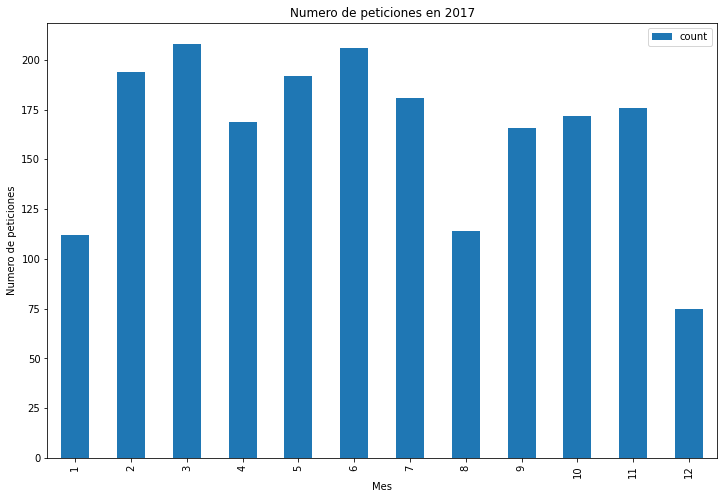

In [ ]:
#Mostramos un grafico de barras para ver que se ha hecho correctamente

ax= counts_2017.plot(x='Month', y='count',kind = 'bar',figsize=(12, 8))
ax.set(xlabel='Mes', ylabel='Numero de peticiones',title='Numero de peticiones en 2017');


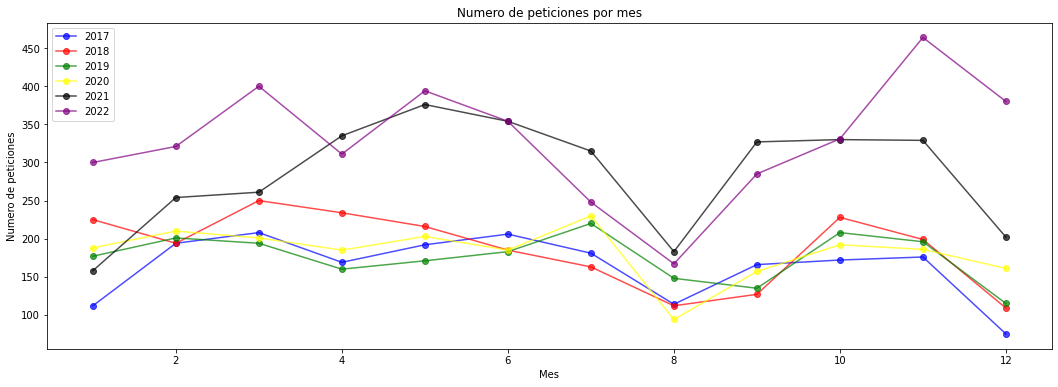

In [ ]:
#Se procede a crear un grafico que muestre los distintos dataframes creados para cada año

#counts_2016.plot(x='Month', y='count', kind='line', color='red', ax=ax, alpha=0.7,marker = 'o')

ax = counts_2017.plot(x='Month', y='count', kind='line', color='blue',alpha=0.7,marker = 'o',figsize=(18, 6))
counts_2018.plot(x='Month', y='count', kind='line', color='red', ax=ax, alpha=0.7,marker = 'o')
counts_2019.plot(x='Month', y='count', kind='line', color='green', ax=ax, alpha=0.7,marker = 'o')
counts_2020.plot(x='Month', y='count', kind='line', color='yellow', ax=ax, alpha=0.7,marker = 'o')
counts_2021.plot(x='Month', y='count', kind='line', color='black', ax=ax, alpha=0.7,marker = 'o')
counts_2022.plot(x='Month', y='count', kind='line', color='purple', ax=ax, alpha=0.7,marker = 'o')

ax.set(xlabel='Mes', ylabel='Numero de peticiones',title='Numero de peticiones por mes')
ax.legend(['2017','2018','2019','2020','2021','2022']);

In [ ]:
new_df = df[df.Fecha_de_creacion > '2017-01-01 00:00']
new_df

,ID,Tipo,Fecha_de_creacion,Fecha_solución_propuesta,Fecha_de_modificacion,Categoria_Final,date,Year,Month,Day,weekday
0,1165252,Extracciones,2022-12-30 14:32:00,NaT,2022-12-30 15:19:00,Extracción de datos,2022-12-30 14:32:00,2022,12,30,4
1,1165248,Extracciones,2022-12-30 14:23:00,NaT,2022-12-30 15:18:00,Extracción de datos,2022-12-30 14:23:00,2022,12,30,4
2,1165245,Gestión de KDE,2022-12-30 14:11:00,NaT,2022-12-30 15:56:00,Gestión de KDE,2022-12-30 14:11:00,2022,12,30,4
3,1165034,Herramientas,2022-12-30 01:09:00,NaT,2022-12-30 10:25:00,Uso de QLIK SENSE,2022-12-30 01:09:00,2022,12,30,4
4,1164938,Herramientas,2022-12-29 17:17:00,NaT,2022-12-29 17:44:00,Uso de QLIK SENSE,2022-12-29 17:17:00,2022,12,29,3
...,...,...,...,...,...,...,...,...,...,...,...
15801,419795,Herramientas,2017-01-04 09:15:00,2017-01-04 12:00:00,2017-01-04 11:35:00,Uso de OBIEE,2017-01-04 09:15:00,2017,1,4,2
15802,419354,Permisos Datapool,2017-01-02 17:09:00,2017-01-02 12:00:00,2017-01-03 16:33:00,Permisos Datapool,2017-01-02 17:09:00,2017,1,2,0
15803,419305,Permisos Datapool,2017-01-02 15:28:00,2017-01-02 12:00:00,2017-01-09 12:41:00,Permisos Datapool,2017-01-02 15:28:00,2017,1,2,0
15804,419239,Extracciones,2017-01-02 13:18:00,2017-01-05 12:00:00,2018-05-23 09:23:00,Categoria_Extracciones.literal.l2,2017-01-02 13:18:00,2017,1,2,0


In [ ]:
new_total_counts = new_df.groupby([new_df['Fecha_de_creacion'].dt.year, new_df['Fecha_de_creacion'].dt.month]).size()
new_total_counts = new_total_counts.rename_axis(["Año", "N_solicitudes_mes"])
new_total_counts[2019]

N_solicitudes_mes
1     180
2     201
3     197
4     158
5     171
6     177
7     219
8     152
9     141
10    222
11    175
12    164
dtype: int64

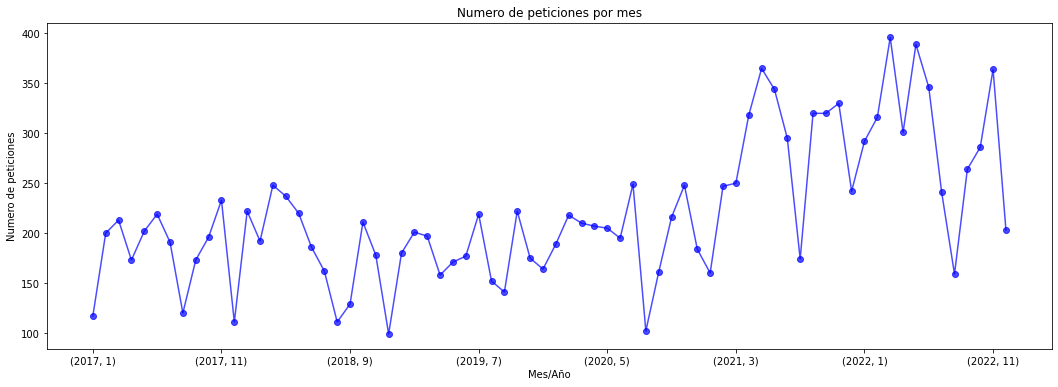

In [ ]:
ax =  new_total_counts.plot(x='Año',y='N_solicitudes_mes',color='blue',alpha=0.7,marker = 'o',figsize=(18, 6))

ax.set(xlabel='Mes/Año', ylabel='Numero de peticiones',title='Numero de peticiones por mes');
#ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=6, bymonthday=1, interval=6))

# Modelos Predictivos clásicos

In [41]:
df1 = df

In [42]:
df1['Fecha_de_creacion'] = df1['Fecha_de_creacion'].dt.date

In [44]:
df1 = df1['Fecha_de_creacion']

In [45]:
df1.head()

0    2022-12-30
1    2022-12-30
2    2022-12-30
3    2022-12-30
4    2022-12-29
Name: Fecha_de_creacion, dtype: object

In [50]:
df_count = df1.groupby(df['Fecha_de_creacion']).size().reset_index(name='Num_peticiones_diarias')
df_count

,Fecha_de_creacion,count
0,2016-08-23,1
1,2016-08-24,2
2,2016-09-01,6
3,2016-09-06,1
4,2016-09-07,1
...,...,...
1622,2022-12-23,3
1623,2022-12-27,7
1624,2022-12-28,7
1625,2022-12-29,6


In [52]:
df_count = df_count.set_index('Fecha_de_creacion')

KeyError: ignored

In [53]:
df_count

,count
Fecha_de_creacion,
2016-08-23,1
2016-08-24,2
2016-09-01,6
2016-09-06,1
2016-09-07,1
...,...
2022-12-23,3
2022-12-27,7
2022-12-28,7


In [56]:
df_count.index

DatetimeIndex(['2016-08-23', '2016-08-24', '2016-09-01', '2016-09-06',
               '2016-09-07', '2016-09-12', '2016-09-15', '2016-09-21',
               '2016-09-23', '2016-09-26',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Fecha_de_creacion', length=1627, freq=None)

In [65]:
df_count.index = pd.to_datetime(df_count.index,format='%Y-%m-%d')

In [66]:
df_count.index

DatetimeIndex(['2016-08-23', '2016-08-24', '2016-09-01', '2016-09-06',
               '2016-09-07', '2016-09-12', '2016-09-15', '2016-09-21',
               '2016-09-23', '2016-09-26',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Fecha_de_creacion', length=1627, freq=None)

In [70]:
df_count.index = pd.DatetimeIndex(df_count.index)

In [71]:
df_count = df_count.asfreq('D')

In [73]:
df_count.index

DatetimeIndex(['2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26',
               '2016-08-27', '2016-08-28', '2016-08-29', '2016-08-30',
               '2016-08-31', '2016-09-01',
               ...
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24',
               '2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Fecha_de_creacion', length=2321, freq='D')

In [74]:
df_count['Num_peticiones_diarias'] = df_count['Num_peticiones_diarias'].fillna(0)
df_count

,count
Fecha_de_creacion,
2016-08-23,1.0
2016-08-24,2.0
2016-08-25,0.0
2016-08-26,0.0
2016-08-27,0.0
...,...
2022-12-26,0.0
2022-12-27,7.0
2022-12-28,7.0


In [75]:
df_count['Num_peticiones_diarias'] = df_count['Num_peticiones_diarias'].astype(int)
df_count

,count
Fecha_de_creacion,
2016-08-23,1
2016-08-24,2
2016-08-25,0
2016-08-26,0
2016-08-27,0
...,...
2022-12-26,0
2022-12-27,7
2022-12-28,7


In [87]:
df_count.tail(10)

,count
Fecha_de_creacion,
2022-12-21,14
2022-12-22,11
2022-12-23,3
2022-12-24,0
2022-12-25,0
2022-12-26,0
2022-12-27,7
2022-12-28,7
2022-12-29,6


<AxesSubplot:xlabel='Fecha_de_creacion'>

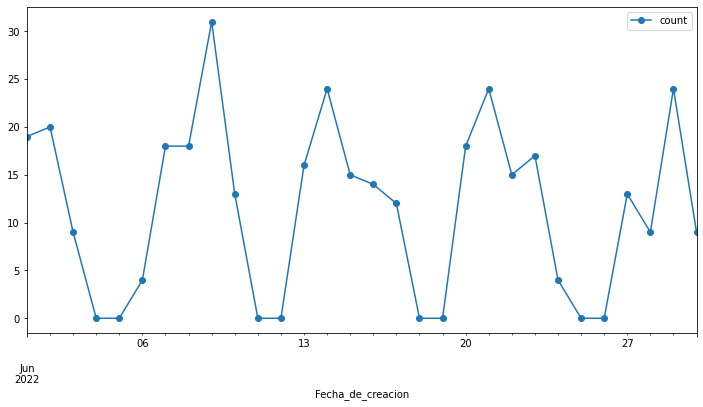

In [88]:
df_count.loc['2022-06'].plot(kind='line',marker = 'o',figsize=(12,6))